Analysis

This data set is looking at the effects of potential treatment medications for Squamus Cell Carcinoma (SCC), on a study of 249 mice. Over the course of 45 days, tumor development was observed and measured.
Referring to the Summary Statistics of this report; We find in the Dataframe measuring the Drug Regimen per the mass of the Tumor, that both Ramicane and Capomulin performed best. They had the lowest means in Tumor mass(g), as well as more mice having more timepoints throughout the 45 days. We can conclude that both medications are successfull in shrinking the (SCC) tumor and the mice are living longer due to treatment.

Similarily, the treatment regimen of Capomulin was further researched. A study was looked at for mouse (y793) specifically. As the 45 days progressed the tumors mass decreased from 43mm3 day 0, to 32mm3 on day 45. I would consider that a success, however, further research should be done for Ramicane that had similar results.



 

In [238]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [64]:
print(mouse_metadata.shape)

(249, 5)


In [65]:
#looking at mouse_metadata_path
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [66]:
print(study_results.shape)

(1893, 4)


In [67]:
#looking at study_results_path
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [68]:
# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on = "Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [69]:
df.info

<bound method DataFrame.info of      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2     Stelasyn   

         Sex  Age_m

In [70]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [71]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
df.groupby(["Mouse ID", "Timepoint"]).size().sort_values()

Mouse ID  Timepoint
a203      0            1
q633      5            1
          0            1
q610      35           1
          30           1
                      ..
g989      20           2
          5            2
          10           2
          0            2
          15           2
Length: 1888, dtype: int64

In [72]:
#g989 has duplicate entries at 20, 5, 10, 0, and 15

In [73]:
# Optional: Get all the data for the duplicate mouse ID.
mask = df["Mouse ID"] =="g989"
df.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [74]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = df["Mouse ID"] != "g989"
df2 = df.loc[mask].reset_index(drop=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [75]:
#dropped 8 rows

In [76]:
# Checking the number of mice in the clean DataFrame.
df2["Mouse ID"].nunique()

248

## Summary Statistics

In [77]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

tumor_avg = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_avg


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [78]:
tumor_median = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [79]:
tumor_var = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [80]:
tumor_std = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [81]:
tumor_sem = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
tumor_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [87]:
# Assemble the resulting series into a single summary DataFrame
Drug_Regimen_Summary = pd.DataFrame({
    "Mean": [tumor_avg],
    "Median": [tumor_median],
    "Varience": [tumor_var],
    "Standard Deviation": [tumor_std],
    "SEM": [tumor_sem]
    
})
Drug_Regimen_Summary

,Mean,Median,Varience,Standard Deviation,SEM
0,Drug Regimen Capomulin 40.675741 Ceftamin ...,Drug Regimen Capomulin 41.557809 Ceftamin ...,Drug Regimen Capomulin 24.947764 Ceftamin ...,Drug Regimen Capomulin 4.994774 Ceftamin ...,Drug Regimen Capomulin 0.329346 Ceftamin ...


In [49]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

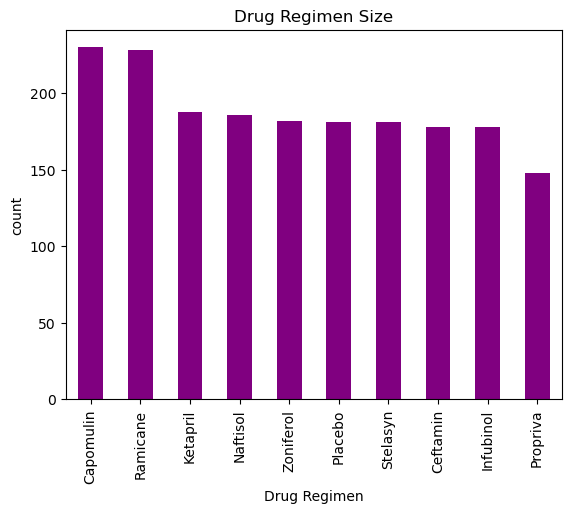

In [103]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
df2.groupby("Drug Regimen").size().sort_values(ascending=False).plot(kind="bar", title="Drug Regimen Size", ylabel="count", color="purple")
plt.show()

Text(0.5, 1.0, 'Mouse Timepoints per Drug Regimen')

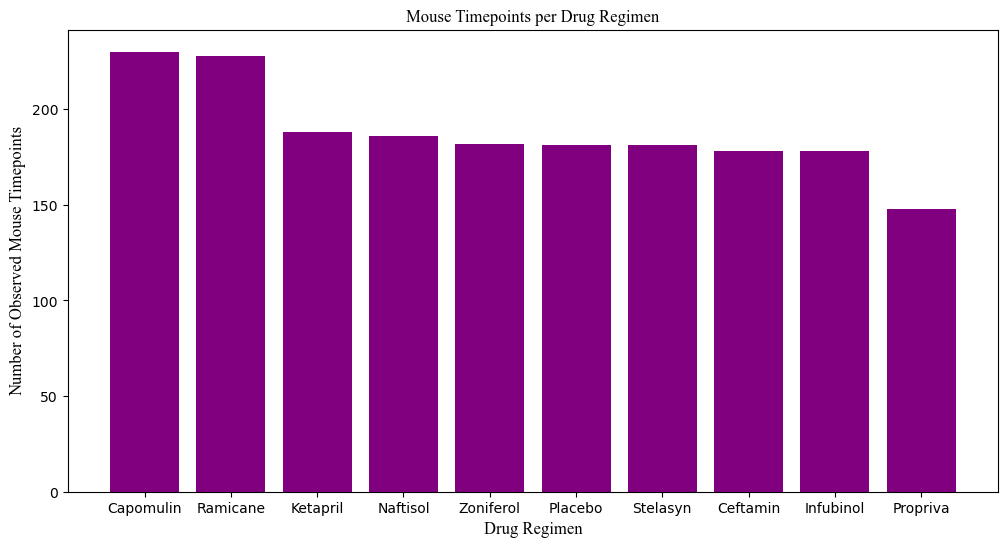

In [116]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
data = df2.groupby("Drug Regimen").size().sort_values(ascending=False)


#change canvas size
plt.figure(figsize=(12, 6))

#create a basic plot
plt.bar(data.index, data.values, color= "purple", align="center")

plt.xlabel("Drug Regimen", fontfamily="Times new roman", fontsize=12)
plt.ylabel("Number of Observed Mouse Timepoints",fontfamily="Times new roman", fontsize=12)
plt.title("Mouse Timepoints per Drug Regimen", fontfamily="Times new roman", fontsize=12)

In [155]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
Gender = df2[["Mouse ID", "Sex"]].drop_duplicates()
Gender


,Mouse ID,Sex
0,b128,Female
1,f932,Male
2,g107,Female
3,a457,Female
4,c819,Male
...,...,...
243,t565,Female
244,i557,Female
245,m957,Female
246,f966,Male


In [160]:
Gender.Sex.value_counts()


Sex
Male      125
Female    123
Name: count, dtype: int64

<Axes: title={'center': 'Mouse Genders'}, ylabel='count'>

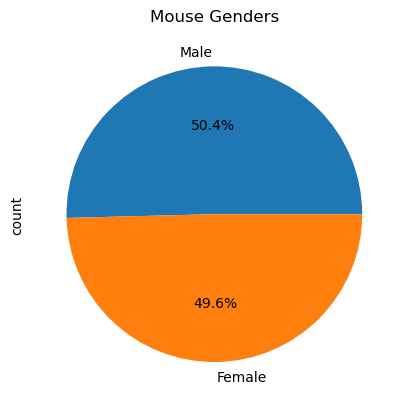

In [166]:
# Make the pie chart
data=Gender.Sex.value_counts()
data.plot(kind="pie", title="Mouse Genders", autopct='%1.1f%%')


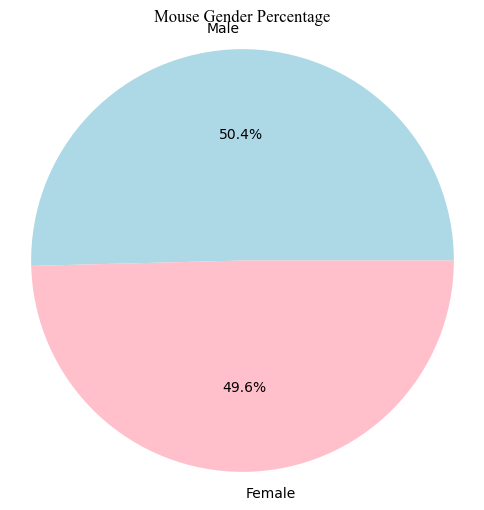

In [179]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
Gender = df2[["Mouse ID", "Sex"]].drop_duplicates()
#change canvas size
plt.figure(figsize=(6, 6))

#create a basic plot
plt.pie(data.values, labels=data.index, colors=["lightblue", "pink"], autopct='%1.1f%%', shadow=False,)

plt.title("Mouse Gender Percentage", fontsize=12, fontfamily="Times new roman")

plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [192]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time = df2.groupby("Mouse ID").Timepoint.max().reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df3 = pd.merge(max_time, df2, on=["Mouse ID", "Timepoint"], how="inner")

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mask= df3["Drug Regimen"].isin(drugs)
df3=df3.loc[mask].reset_index(drop=True)
df3

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [219]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = df3["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Locate the rows which contain mice on each drug and get the tumor volumes

for treatment in treatment_list:
    # Locate the rows which contain mice on each drug
    treatment_data = (df3.loc["Drug Regimen"]) == treatment
    # add subset
    tumor_volumes.append(treatment_data)
    
#Calculate the IQR and quantitatively determine if there are any potential outliers.

    Q1 = np.percentile(volumes, 25) 
    Q3 = np.percentile(volumes, 75)  
    IQR= Q3 - Q1

# Determine outliers using upper and lower bounds

    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR 
   
    # Print the treatment and its potential outliers 
    print(f"{treatment} potential outliers: {outliers}")

#Thank you Xpert


KeyError: 'Drug Regimen'

In [ ]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

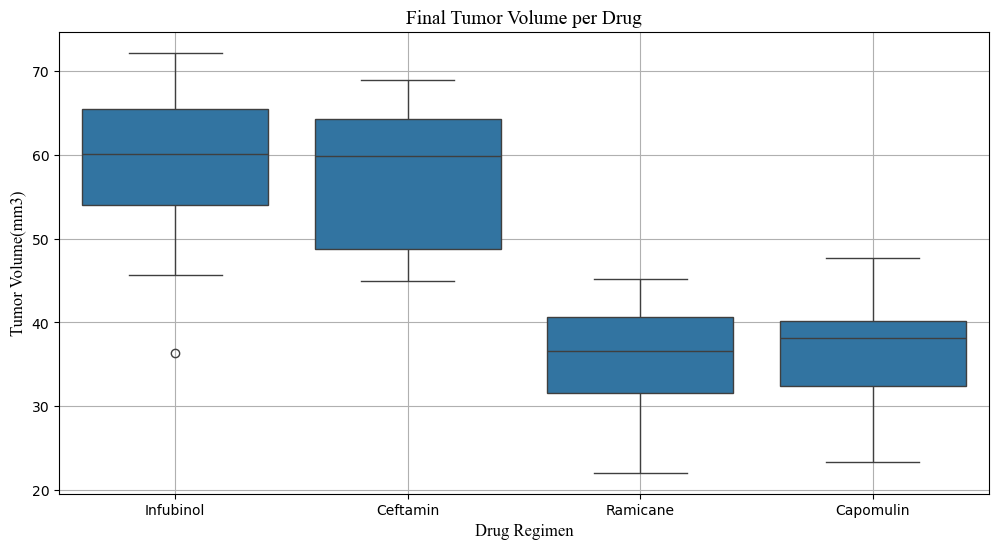

In [227]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(12,6))
sns.boxplot(data=df3, y="Tumor Volume (mm3)", x="Drug Regimen")

plt.xlabel("Drug Regimen", fontfamily="Times new roman", fontsize=12)
plt.ylabel("Tumor Volume(mm3)", fontfamily="Times new roman", fontsize=12)
plt.title("Final Tumor Volume per Drug", fontfamily="Times new roman", fontsize=14)
plt.grid()

## Line and Scatter Plots

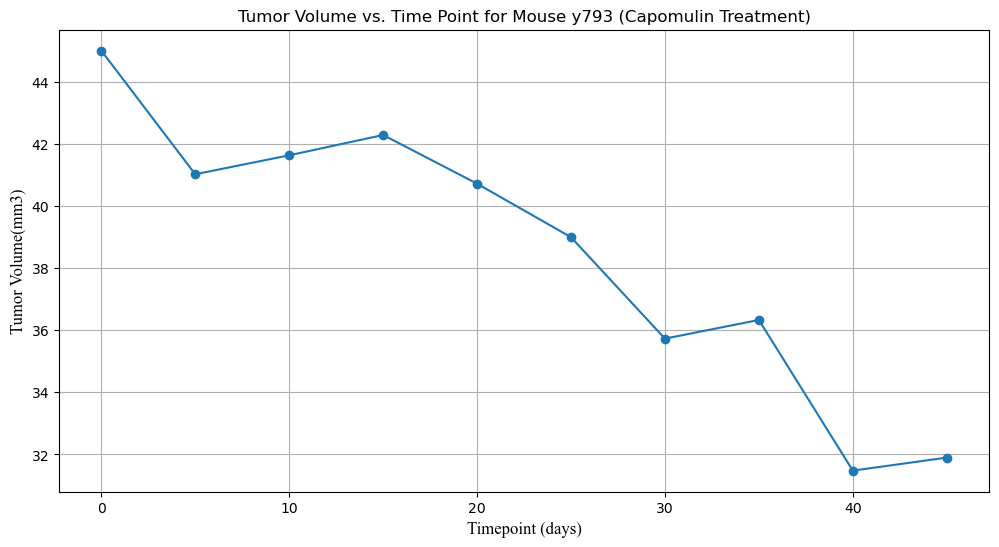

In [226]:
#Find a specific mouse treated with Capomuli
mouse_id = "y793"
mouse_data = df2[df2['Mouse ID'] == mouse_id]
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.figure(figsize=(12,6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-')
plt.xlabel("Timepoint (days)", fontfamily="Times new roman", fontsize=12)
plt.ylabel("Tumor Volume(mm3)", fontfamily="Times new roman", fontsize=12)
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)')

plt.grid()
plt.show()

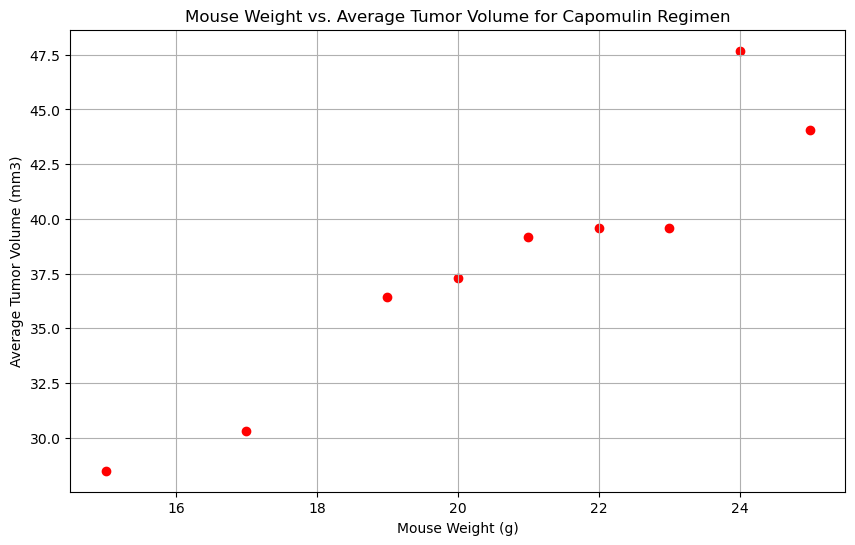

In [234]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = df3[df3['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume by mouse weight
average_tumor_volume = capomulin_data.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], color='red')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid()
plt.show()

## Correlation and Regression

In [263]:
# Calculate the correlation coefficient and a linear regression model
x_values = capomulin_data["Weight (g)"]
y_values= capomulin_data["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
print(line_eq)

y= 1.75x + 1.45


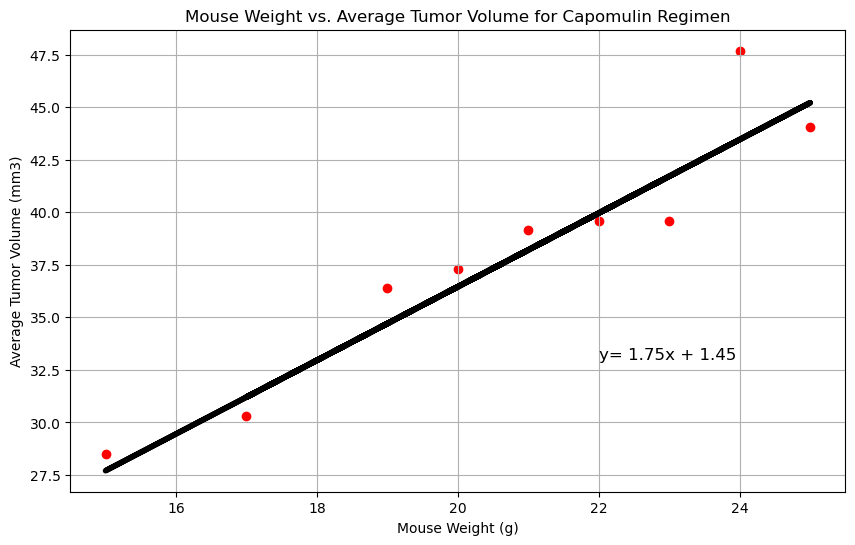

In [264]:
#make plot
capomulin_data = df3[df3['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume by mouse weight
average_tumor_volume = capomulin_data.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], color='red')
#line of best fit
plt.plot(capomulin_data['Weight (g)'], regression_values, color="black", linewidth=4)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid()

#annotation
plt.annotate(line_eq, (22,33), fontsize=12, color="black")
plt.show()

In [262]:
#Correlation Coefficient
rvalue

0.8767060403658119